# Analysis of Gaussian Mixture Models 

This notebook shows examples and usage of the biokit.stats.module. 

The **mixture** module provides tools to create mixture models (gaussian) and to estimate the parameters of the GMM using either minimization or Expectation Minimization. 

We also provide examples to show how to automatically estimate the number of GMMs and limitations of such methods. 

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.style.use('ggplot')
from biokit.stats import mixture

Populating the interactive namespace from numpy and matplotlib


### gaussian mixture model

In [2]:
m = mixture.GaussianMixture(mu=[-2, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=60)

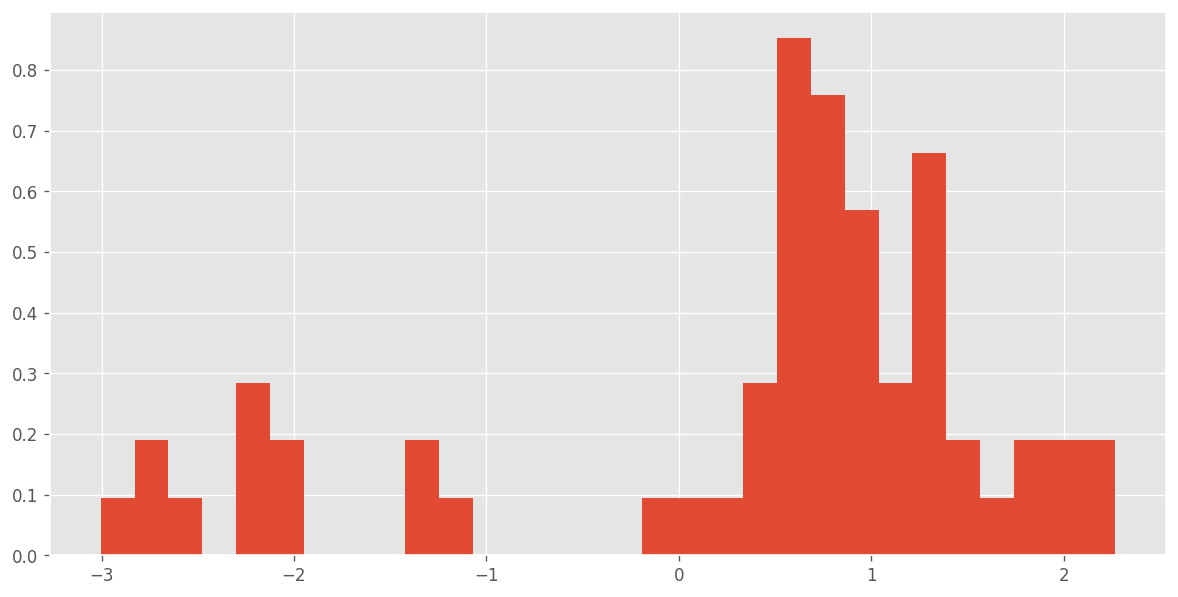

In [3]:
# data is stored in m.data and an histogram can easily be shown:
m.hist()

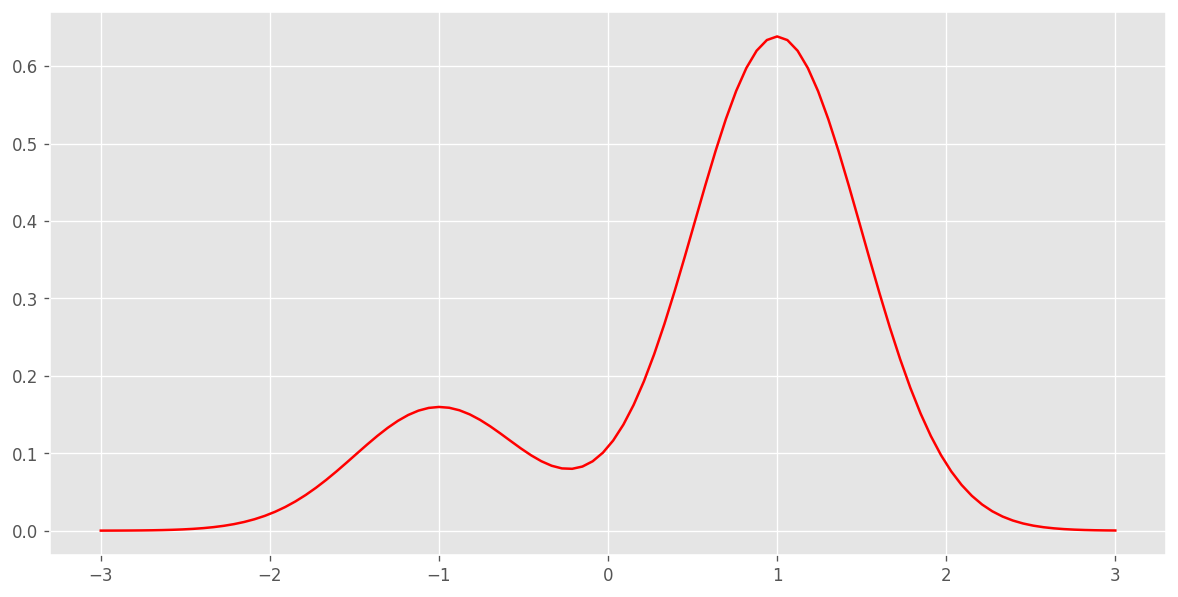

In [4]:
# In order to figure out the underlying parameters of the distribution
# given in the above sample, we will first use the GaussianMixtureFitting 
# class, which minimizes the  distribution of the data to a mixture 
# of gaussian model. A conveninet class to generate the data is the
# GaussianMixtureModel class, which can be used to plot the final distribution:
gmm = mixture.GaussianMixtureModel(k=2)

X = linspace(-3,3,100)
plot(X, gmm.pdf(X, params=[-1,0.5,0.2,1,0.5,0.8]), 'r')

### Gaussian Mixture model Fitting (minimization)

In [5]:
# now, let us use the following class to figure out the parameters of the
# gaussian models. We have to provide the number of models defined by 
# the k=2 parameter
mf = mixture.GaussianMixtureFitting(m.data, k=2)

In [6]:
#
mf.estimate()

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:196: RuntimeWarning: divide by zero encountered in log
  res = -1 * pylab.log(self.pdf(sample, params)).sum()


            AIC: 160.64495964285888
           AICc: 160.85548595864836
            BIC: 6.51293499162551
  final_simplex: (array([[-2.10764479,  0.57846606,  0.24177802,  1.00262371,  0.53343846,
         0.96762522],
       [-2.10771465,  0.57839705,  0.24174896,  1.00261781,  0.53342275,
         0.96764381],
       [-2.10758057,  0.57845857,  0.24174568,  1.00262305,  0.5334604 ,
         0.96764914],
       [-2.10764807,  0.57837758,  0.24180314,  1.00265726,  0.53343376,
         0.96768773],
       [-2.10757548,  0.57842334,  0.24177662,  1.00261902,  0.53341881,
         0.96765882],
       [-2.10771114,  0.57843637,  0.24170288,  1.00264809,  0.53345212,
         0.96768009],
       [-2.10761719,  0.57846587,  0.24175594,  1.00266729,  0.53340367,
         0.9676788 ]]), array([78.32247982, 78.32247985, 78.32247988, 78.32247989, 78.32247992,
       78.32248005, 78.32248009]))
            fun: 78.32247982142944
 log_likelihood: 78.32247982142944
        message: 'Optimization t

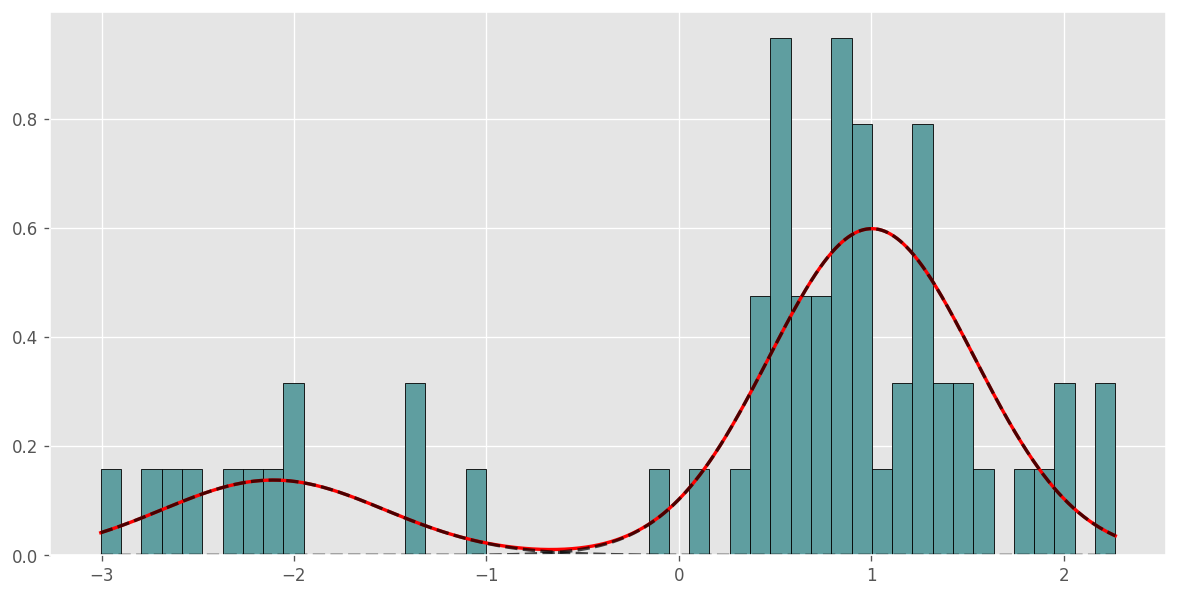

In [7]:
mf.plot()

### Expectation Minimization

Another method to estimate the parameters is to use an Expectation
Minimization algorithm

In [8]:
em = mixture.EM(m.data, model=gmm)

In [9]:
em.estimate()

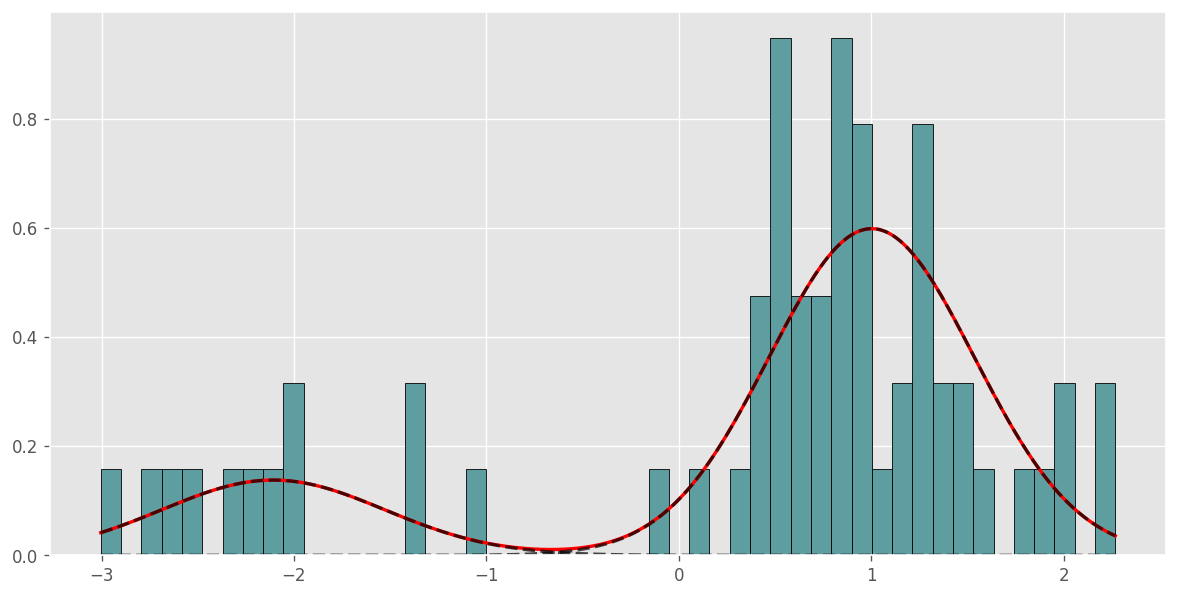

In [10]:
em.plot()

In [11]:
em.results.mus

[-2.1076528479650474, 1.0026363035019303]

In [12]:
# to compare to numerical values found with the GaussianMixtureFitting 
mf.results.mus

[-2.1076447893855734, 1.0026237140310972]

### How EM and minimization compare in terms of parameter estimation

Is the EM better than MixtureFitting class (scipy minimisation) ?

We can check that by generating N simulated data sets for some parameters

In [24]:
res_mf = []; res_em = []
N = 50
from easydev import Progress
replicates = 100
p = Progress(replicates)

mus = [-2,1]
sigmas = [0.5,0.5]
pis= [.2,0.8]
for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=mus, sigma=sigmas, mixture=pis, N=N)
    mf = mixture.GaussianMixtureFitting(m.data)
    mf.estimate(guess=[-.8,0.5,0.5,.8,0.5,0.5])
    res_mf.append(mf.results)
    
    em = mixture.EM(m.data, model=gmm)
    em.estimate(guess=[-.8, 0.5, 0.5, .8, 0.5, 0.5])
    res_em.append(em.results)
    #p.animate(i+1)
    
    

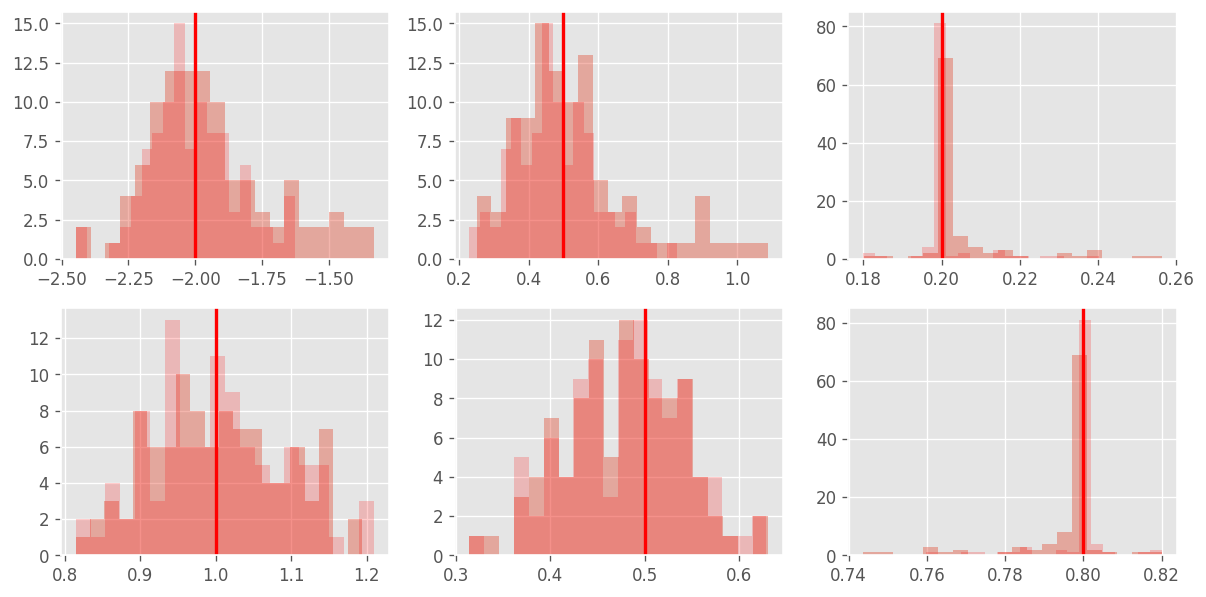

In [25]:
subplot(2,3,1)
hist([x.mus[0] for x in res_mf], 20, alpha=0.4);
hist([x.mus[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[0], color='r', lw=2)

subplot(2,3,2)
hist([x.sigmas[0] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[0], color='r', lw=2)

subplot(2,3,3)
hist([x.pis[0] for x in res_mf], 20, alpha=0.4);
hist([x.pis[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[0], color='r', lw=2)

subplot(2,3,4)
hist([x.mus[1] for x in res_mf], 20, alpha=0.4);
hist([x.mus[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[1], color='r', lw=2)

subplot(2,3,5)
hist([x.sigmas[1] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[1], color='r', lw=2)

subplot(2,3,6)
hist([x.pis[1] for x in res_mf], 20, alpha=0.4);
hist([x.pis[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[1], color='r', lw=2)


Performace are quite similar on this example, but this may not always be the case !

### Adaptive Estimation of required number of models

In [26]:
m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=60)

In [27]:
# if we know that k=2, it is easy to estimate the parameters
res = mf.estimate(k=2)

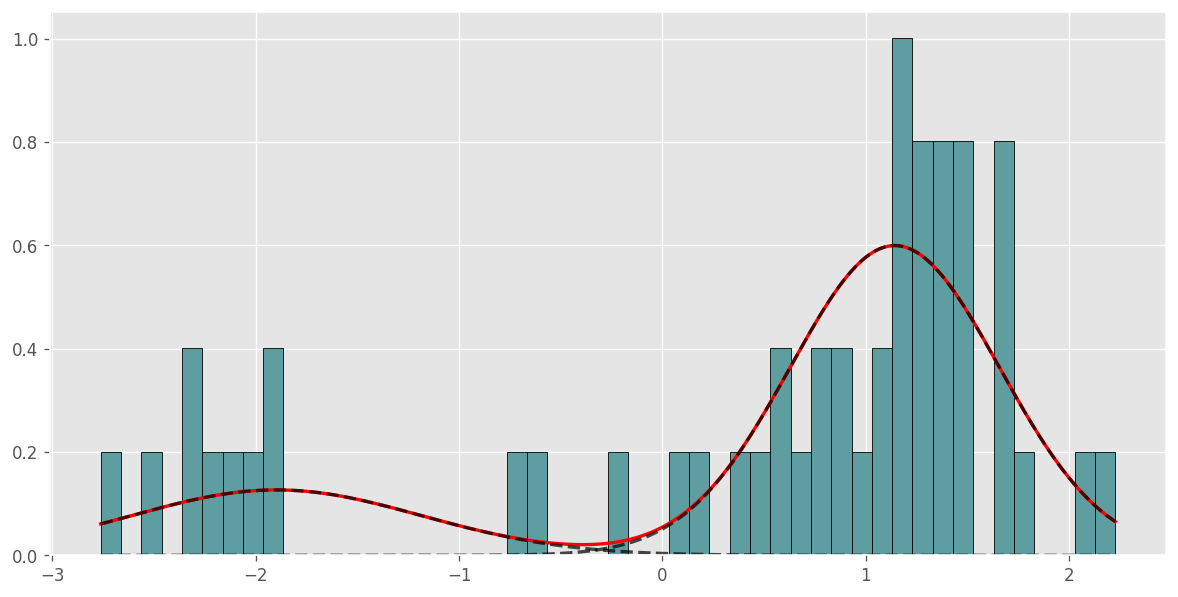

In [28]:
mf.plot()

### What about automatic inference of k ?

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:196: RuntimeWarning: divide by zero encountered in log
  res = -1 * pylab.log(self.pdf(sample, params)).sum()


Found min  121.29031304215783 for k   3


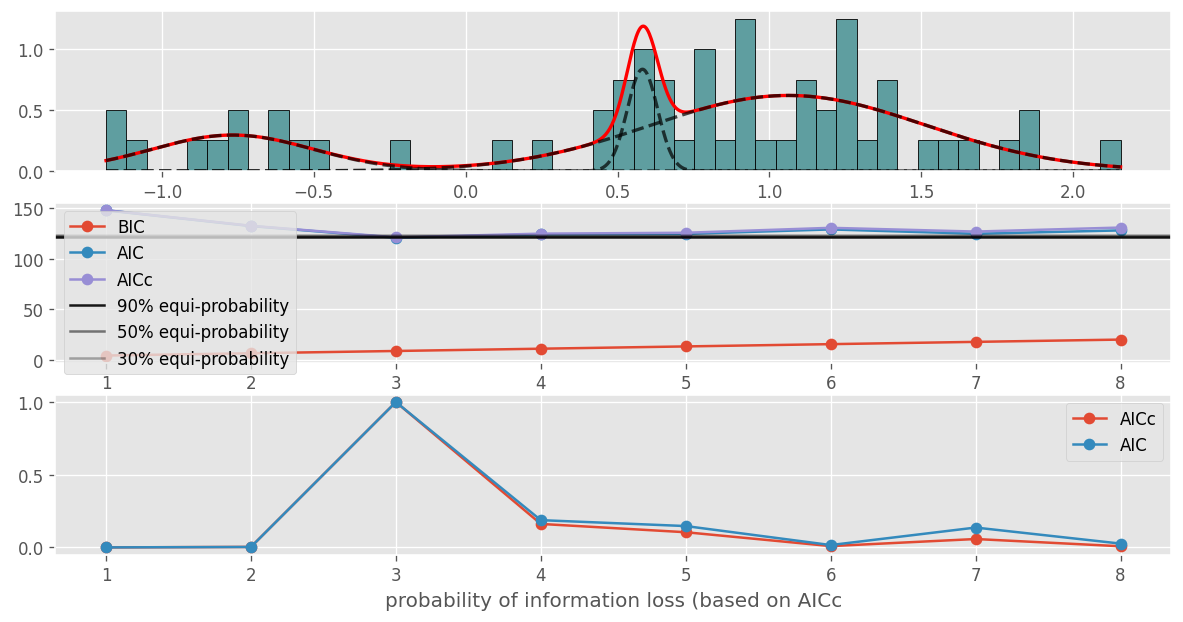

In [29]:
amf = mixture.AdaptativeMixtureFitting(m.data)
amf.diagnostic(kmin=1, kmax=8)

The proposed/optimal k in terms of Aikike is k=4, which is 
not correct.

What about using EM ?

In [30]:
amf.fitting = mixture.EM(m.data)

In [31]:
amf.run(kmin=1, kmax=8)

issue arised at iteration 41
Found min  121.29051060520766 for k   3


/home/cokelaer/miniconda3/envs/biokit/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/cokelaer/miniconda3/envs/biokit/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


issue arised at iteration 41
Found min  121.29051060520766 for k   3


/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:196: RuntimeWarning: divide by zero encountered in log
  res = -1 * pylab.log(self.pdf(sample, params)).sum()


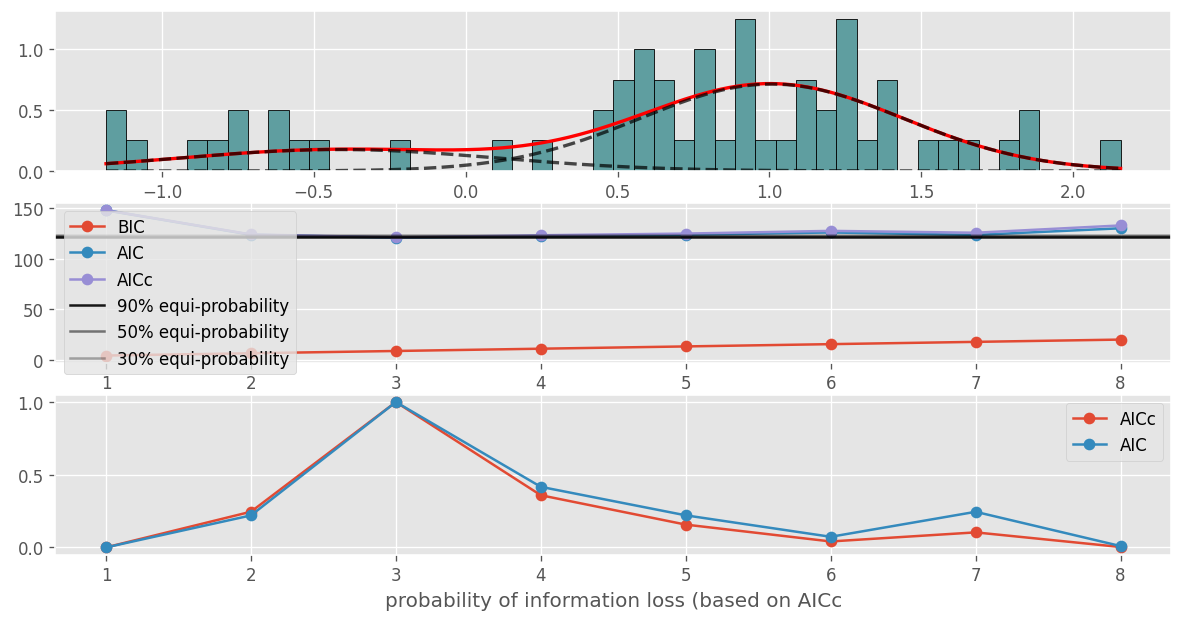

In [32]:
amf.diagnostic(k=2)

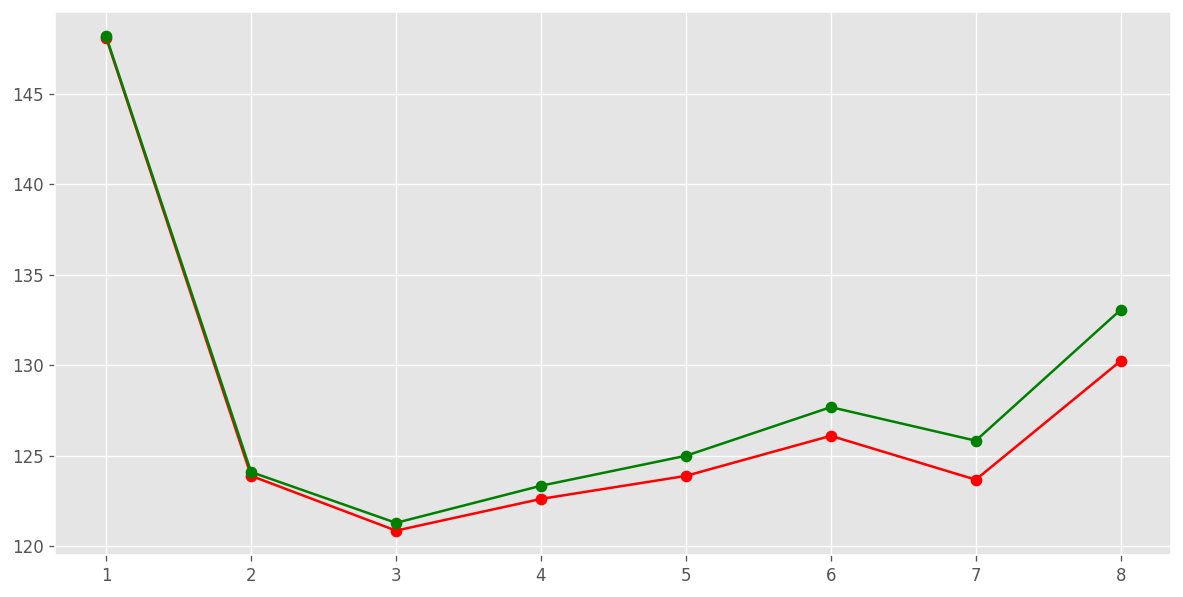

In [33]:
plot(amf.x[0:8], [amf.all_results[i]['AIC'] for i in amf.x[0:8]], 'or-')
plot(amf.x[0:8], [amf.all_results[i]['AICc'] for i in amf.x[0:8]], 'og-')

Now the question is how reliable is this estimation of k on 100 experiments ?

In [35]:

bestk_em = []
aics_em = []

bestk_m = []
aics_m = []

replicates = 100
p = Progress(replicates)

for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=1000)
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.fitting = mixture.EM(m.data)
    amf.run()
    bestk_em.append(amf.best_k)
    aics_em.append(amf.fitting.results.AIC)
    
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.run()
    bestk_m.append(amf.best_k)
    aics_m.append(amf.fitting.results.AIC)
    
    #p.animate(i+1)

KeyboardInterrupt: 

In [ ]:
res = hist([bestk_em, bestk_m])
legend(['EM', 'minimization'])

In [ ]:
hist([aics_em, aics_m])


### Conclusions

When N = 60, the adaptative EM or Minimization methods do not allow the 
recovery of k automaticaly. You need more data e.g. ~ 1000 points